## Clustrering analysis and validation of KMeans and DBSCAN clustering algorithm 

### (1) Analysis of Kmeans Clustering Algorithm

### Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
%matplotlib inline

### Importing Dataset

In [2]:
dataset = pd.read_csv('soildataset.csv')
X = dataset.iloc[:, 1:4].values

In [3]:
dataset.head()

,Id,Nitrogen,Phosphorous,Potassium,Content of Nitrogen,Content of Phosphorous,Content of Potassium
0,1,3.67,2.45,2.990,Low,Low,High
1,2,3.99,2.51,2.890,Medium,Low,High
2,3,4.31,2.57,2.019,High,Low,Low
3,4,3.53,2.63,3.040,Low,Low,High
4,5,3.56,2.69,2.880,Low,Low,High


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      150 non-null    int64  
 1   Nitrogen                150 non-null    float64
 2   Phosphorous             150 non-null    float64
 3   Potassium               150 non-null    float64
 4   Content of Nitrogen     150 non-null    object 
 5   Content of Phosphorous  150 non-null    object 
 6   Content of Potassium    150 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 8.3+ KB


### Using the elbow method to find the optimal number of clusters

C:\Users\Shubham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


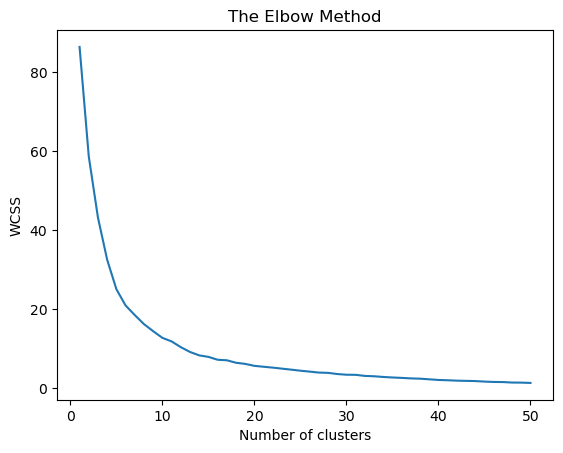

In [5]:
wcss = []
for i in range(1, 51):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 51), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###  From the above elbow we can clearly depict that the optimal no of clusters are between 5 to 10 So finding the silhoutte coefficient for the range 5 to 10 will give us the correct value of Optimum Clusters.

### Finding Silhouette score to get the accurate no of clusters

In [6]:
sil_score = []
n_clusters = []
for i in range(5, 15):
    test_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    test_kmeans.fit(X)
    test_labels = test_kmeans.predict(X)
    n_clusters.append(i)
    sil_score.append(metrics.silhouette_score(X,test_labels))
    #print("Silhoutte_score for n_cluster = " + str(i) + " is : " + str(metrics.silhouette_score(X,test_labels)))
data = {"No of clusters": n_clusters, "Silhouette_Score": sil_score}
accuracy = pd.DataFrame(data)
accuracy

,No of clusters,Silhouette_Score
0,5,0.384627
1,6,0.401305
2,7,0.417535
3,8,0.436840
4,9,0.408780
5,10,0.429608
6,11,0.441726
7,12,0.388546
8,13,0.445551
9,14,0.404723


#### According to elbow method optimum value of K is 8 and according to silhouette score optimum value of K is 13 but as silhouette score of both K=8 and K=13 is haning difference of 0.01 so we can consider K=8 as K=13 will generate much more clusters 

### Training the Kmeans model on Dataset

In [7]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

### Visualizing the clusters using 3D scatter plot

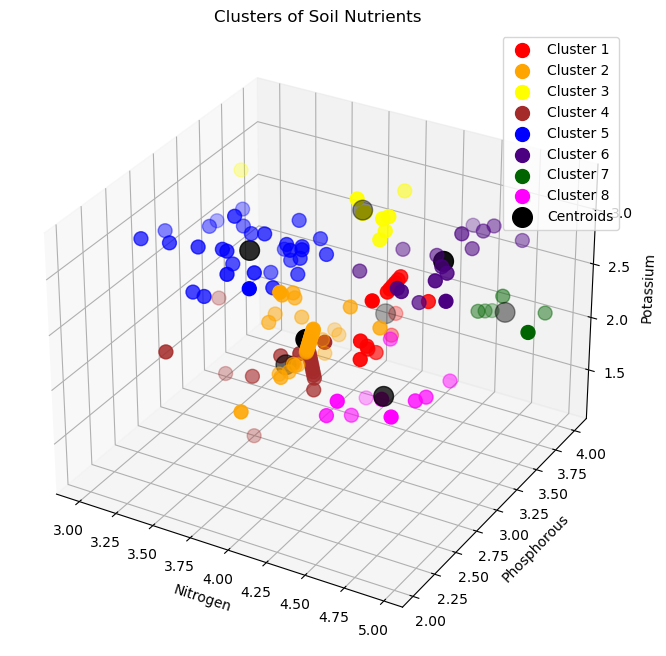

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[labels==0, 0], X[labels==0, 1], X[labels==0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(X[labels==1, 0], X[labels==1, 1], X[labels==1, 2], s=100, c='orange', label='Cluster 2')
ax.scatter(X[labels==2, 0], X[labels==2, 1], X[labels==2, 2], s=100, c='yellow', label='Cluster 3')
ax.scatter(X[labels==3, 0], X[labels==3, 1], X[labels==3, 2], s=100, c='brown', label='Cluster 4')
ax.scatter(X[labels==4, 0], X[labels==4, 1], X[labels==4, 2], s=100, c='blue', label='Cluster 5')
ax.scatter(X[labels==5, 0], X[labels==5, 1], X[labels==5, 2], s=100, c='indigo', label='Cluster 6')
ax.scatter(X[labels==6, 0], X[labels==6, 1], X[labels==6, 2], s=100, c='darkgreen', label='Cluster 7')
ax.scatter(X[labels==7, 0], X[labels==7, 1], X[labels==7, 2], s=100, c='#ff00ff', label='Cluster 8')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='black', label='Centroids')
ax.set_title('Clusters of Soil Nutrients')
ax.set_xlabel('Nitrogen')
ax.set_ylabel('Phosphorous')
ax.set_zlabel('Potassium')
plt.legend()
plt.show()

### (2) Analysis of DBSCAN algorithm

### Importing the libraries 

In [9]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

### Using K-Distance Graph to find the optimal value of epsilon and minpoints

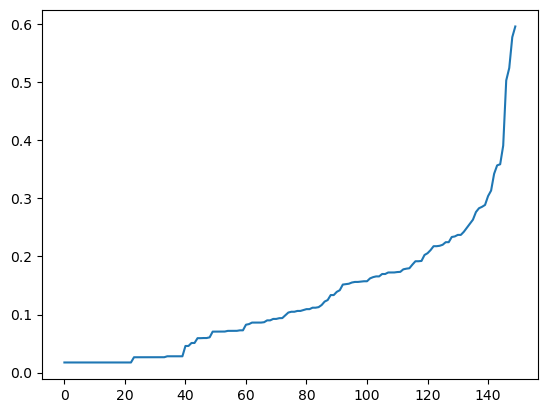

In [10]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### According to above graph we are getting elbow nearly at 0.25 so we can consider eps=0.25

### Finding Silhouette score to get the accurate no of clusters

In [11]:
sil_score = []
n_cluster = []
epsilon = []
minpts = []
for i in range(3,7):
    for j in np.arange(0.15,0.35,0.05):
        dbscan = DBSCAN(eps=j,min_samples=i)
        epsilon.append(j)
        minpts.append(i)
        model = dbscan.fit(X)
        labels = model.labels_ 
        sample_cores = np.zeros_like(labels,dtype=bool)
        sample_cores[dbscan.core_sample_indices_] = True
        n_clusters = len(set(labels))- (1 if -1 in labels else 0)
        sil_score.append(metrics.silhouette_score(X,labels))
        n_cluster.append(n_clusters)
data = {"Epsilon":epsilon,"Minpts":minpts,"No of clusters": n_cluster, "Silhouette_Score": sil_score}
accuracy = pd.DataFrame(data)
accuracy

,Epsilon,Minpts,No of clusters,Silhouette_Score
0,0.15,3,11,0.052748
1,0.20,3,13,0.192641
2,0.25,3,8,0.163395
3,0.30,3,6,0.259036
4,0.15,4,7,0.015147
5,0.20,4,10,0.151316
6,0.25,4,6,0.221395
7,0.30,4,7,0.214950
8,0.15,5,6,-0.001323
9,0.20,5,7,0.093662


#### Using the K-distance graph and Silhouette score optimum value of eps = 0.30, K = 6 with minpts = 3 for the best silhouette score = 0.259

### Visualizing the clusters using 3D scatter plot

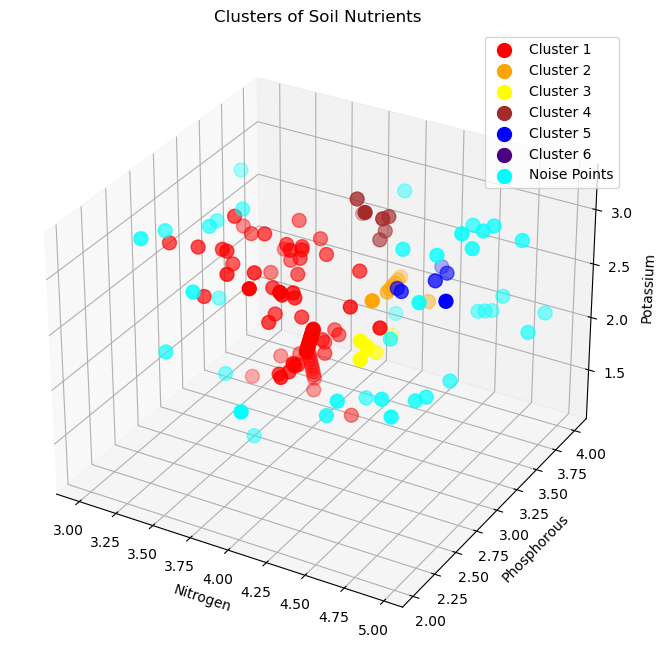

In [12]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[labels==0, 0], X[labels==0, 1], X[labels==0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(X[labels==1, 0], X[labels==1, 1], X[labels==1, 2], s=100, c='orange', label='Cluster 2')
ax.scatter(X[labels==2, 0], X[labels==2, 1], X[labels==2, 2], s=100, c='yellow', label='Cluster 3')
ax.scatter(X[labels==3, 0], X[labels==3, 1], X[labels==3, 2], s=100, c='brown', label='Cluster 4')
ax.scatter(X[labels==4, 0], X[labels==4, 1], X[labels==4, 2], s=100, c='blue', label='Cluster 5')
ax.scatter(X[labels==5, 0], X[labels==5, 1], X[labels==5, 2], s=100, c='indigo', label='Cluster 6')
ax.scatter(X[labels==-1, 0], X[labels==-1, 1], X[labels==-1, 2], s=100, c='cyan', label='Noise Points')

#ax.scatter(DBSCAN.cluster_centers_[:, 0], DBSCAN.cluster_centers_[:, 1], DBSCAN.cluster_centers_[:, 2], s=200, c='cyan', label='Centroids')
ax.set_title('Clusters of Soil Nutrients')
ax.set_xlabel('Nitrogen')
ax.set_ylabel('Phosphorous')
ax.set_zlabel('Potassium')
plt.legend()
plt.show()